# Project 23 - Predicting Employee Productivity Using Tree Models

For this guided project, we'll be introducing the dataset [Productivity Prediction of Garment Employees](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees). Below is a description of the dataset, arrording to its official summary:

<i>"The garment industry is one of the key examples of the industrial globalization of the modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories."</i>

The dataset can be used with both regression and classification algorithms.

<b> The goal of this project is to build a tree model that predicts employee productivity.</b>

## Reading in the Data

In [32]:
import pandas as pd

df = pd.read_csv('garments_worker_productivity.csv')
print(df.shape)
df.head()

(1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


The dataset has 1197 rows and 15 columns. The columns are the following:
|column|description|
|:-----:|-----------|
|date| date in MM-DD-YYYY|
|quarter| a portion of the <b>month</b>: month was divided into four quarters|
|department|associated department with the instance|
|day|day of the week|
|team|associated team number with the instance|
|targeted_productivity|targeted productivity set by the authority for each team for each day|
|smv| standard minute value - the allocated time for a task|
|wip|work in progress - includes the number of unfinished items for products|
|over_time|represents the amount of overtime by each team in minutes|
|incentive|represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action|
|idle_time|the duration of time when the production was interrupted due to several reasons|
|idle_men|the number of workers who were idle due to production interruption|
|no_of_style_change|number of changes in the style of a particular product|
|no_of_workers|number of workers on each team|
|actual_productivity|the actual % of productivity that was delivered by the workers — it ranges from 0 to 1|

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

From the info above we can see that column `wip` contains null values (it's the only one with 691 instead of 1197). We can also see what type each column is (they all seem to be correct types). Let's confirm that `wip` has null values.

In [34]:
print(df.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


There are 506 null values in `wip`.

In [35]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Let's also look at some correlations using seaborn's heatmap.

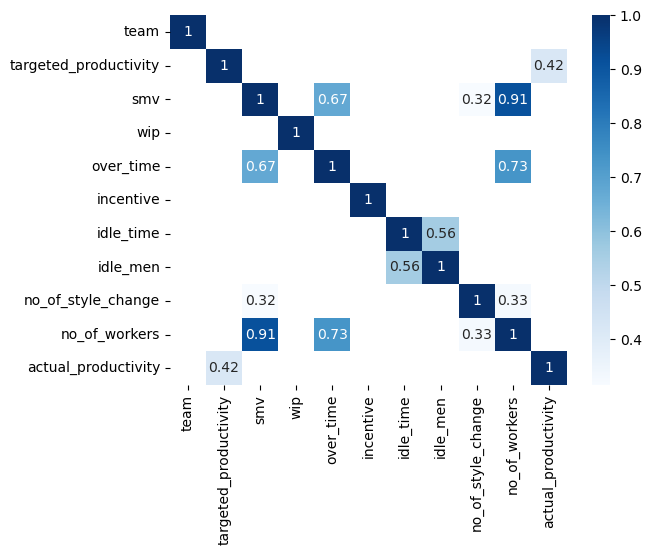

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
#numerical columns were all expect first 4
numerical_df = df.iloc[:,4:]
correlations = abs(numerical_df.corr())
sns.heatmap(correlations[correlations >0.3], annot=True, cmap='Blues')
plt.show()

Above we have a heatmap that only shows correlations over 0.3 (using absolute values, so it also shows those that were under -0.3). We can see that for example `targeted_productivity` correlates with `actual_productivity` only by 0.42, meaning that the targets seem to be quite far from the actual productivity.

## Dataset Cleaning

Next we are going to clean our dataset. We want to fix all the incorrect observations and decide which columns are important for our tree model.

### Department Column

The `department` column has some incorrect values. If we print all the unique values, we get three instead of two: `sweing`, `finishing ` and `finishing`. There is extra space between the first finishing, so we need to fix that.

In [37]:
print(df['department'].unique())
print(df['department'].value_counts())

['sweing' 'finishing ' 'finishing']
department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64


In [38]:
df['department'] = df['department'].replace('finishing ', 'finishing')
print(df['department'].unique())
print(df['department'].value_counts())

['sweing' 'finishing']
department
sweing       691
finishing    506
Name: count, dtype: int64


### Changing all the columns to numerical values

We now need to clean the columns so that they are usable in our model. For example we need to change `department` columns `sweing` and `finishing` to 1 and 0, create some dummy variables etc. Let's start by dropping the date column and changing the department values.

In [39]:
df = df.drop(columns='date')
df['department'] = df['department'].apply(lambda x: 1 if x == 'sweing' else 0)
df = df.rename(columns= {'department': 'department_sweing'})
df.head()

,quarter,department_sweing,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,1,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,0,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,1,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,1,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,1,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


#### Dummy variables (quarter, day, team)

There are 5 different quarters, but they are not different ranks, meaning that `Quarter 5` isn't any better or worse than `Quarter 1`. The same goes for the column `day`, if we change Monday to 0, it isn't any better or worse than Tuesday with 1. Team's also have unique numbers, which don't represent how good the teams are. Because of this we will create dummy variables.

In [40]:
df = pd.get_dummies(df, columns=['quarter','day','team'], prefix=['quarter', 'day', 'team'])
df

,department_sweing,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,False,False,False,False,False,True,False,False,False,False
1,0,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,False,False,False,False,False,False,False,False,False,False
2,1,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,False,False,False,False,False,False,False,False,True,False
3,1,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,False,False,False,False,False,False,False,False,False,True
4,1,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0,0.75,2.90,NaN,960,0,0.0,0,0,8.0,...,False,False,False,False,False,False,False,True,False,False
1193,0,0.70,3.90,NaN,960,0,0.0,0,0,8.0,...,False,False,False,False,False,True,False,False,False,False
1194,0,0.65,3.90,NaN,960,0,0.0,0,0,8.0,...,False,False,False,False,True,False,False,False,False,False
1195,0,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,...,False,False,False,False,False,False,True,False,False,False


In [41]:
df.dtypes

department_sweing          int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
quarter_Quarter1            bool
quarter_Quarter2            bool
quarter_Quarter3            bool
quarter_Quarter4            bool
quarter_Quarter5            bool
day_Monday                  bool
day_Saturday                bool
day_Sunday                  bool
day_Thursday                bool
day_Tuesday                 bool
day_Wednesday               bool
team_1                      bool
team_2                      bool
team_3                      bool
team_4                      bool
team_5                      bool
team_6                      bool
team_7                      bool
team_8                      bool
team_9    

Now we only have numerical values. Let's next find out some correlations to find out which columns we will use for our model.

### Removing columns

Since we are interested in productivity, we want to find out the optimal columns for this target. `actual_productivity` and `targeted_productivity` didn't have high correlation with any other columns, so we need to decide what columns to drop with some other way. 

<b>The plan I am going to use to determine the important columns is the following:</b>

1. Filter the data to only contain `actual_productivity` over 1.
2. Create a heatmap for this filtered dataframe
3. If correlation with `targeted_productivity` is over 0.3, use as a feature

I also want to try if `wip` becomes important, when changing all the null values to the mean value.

#### Using Null `wip` Values

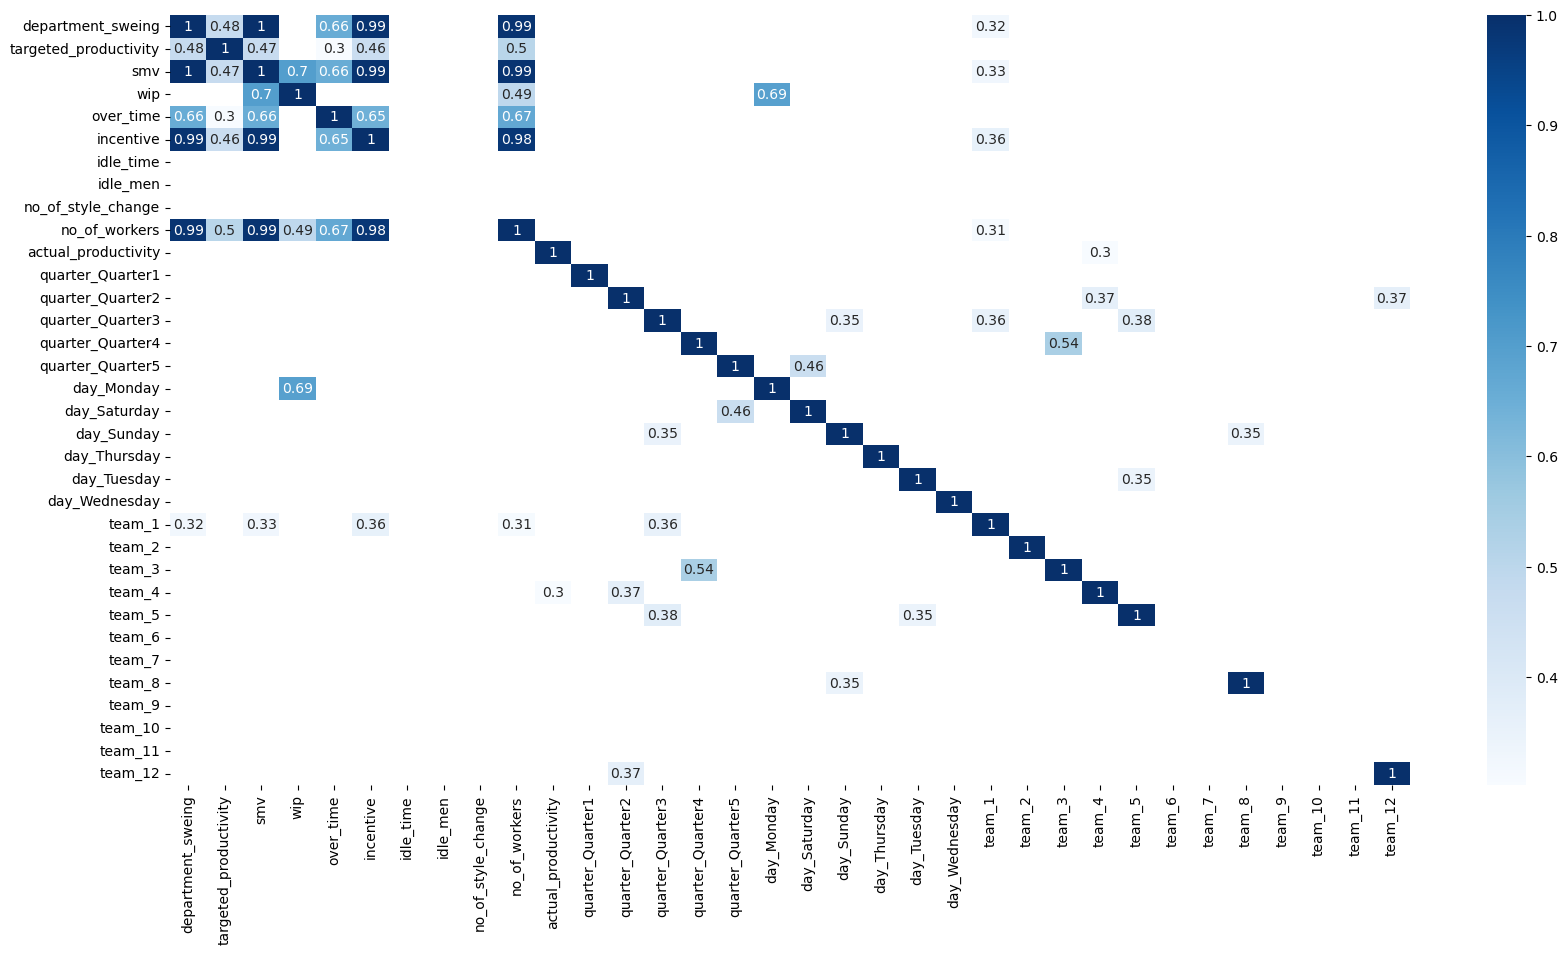

In [42]:
filtered_df = df[df['actual_productivity'] > 1]
filtered_correlations = filtered_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(filtered_correlations[filtered_correlations > 0.3], annot=True, cmap='Blues')
plt.show()

#### Using Mean `wip` Values

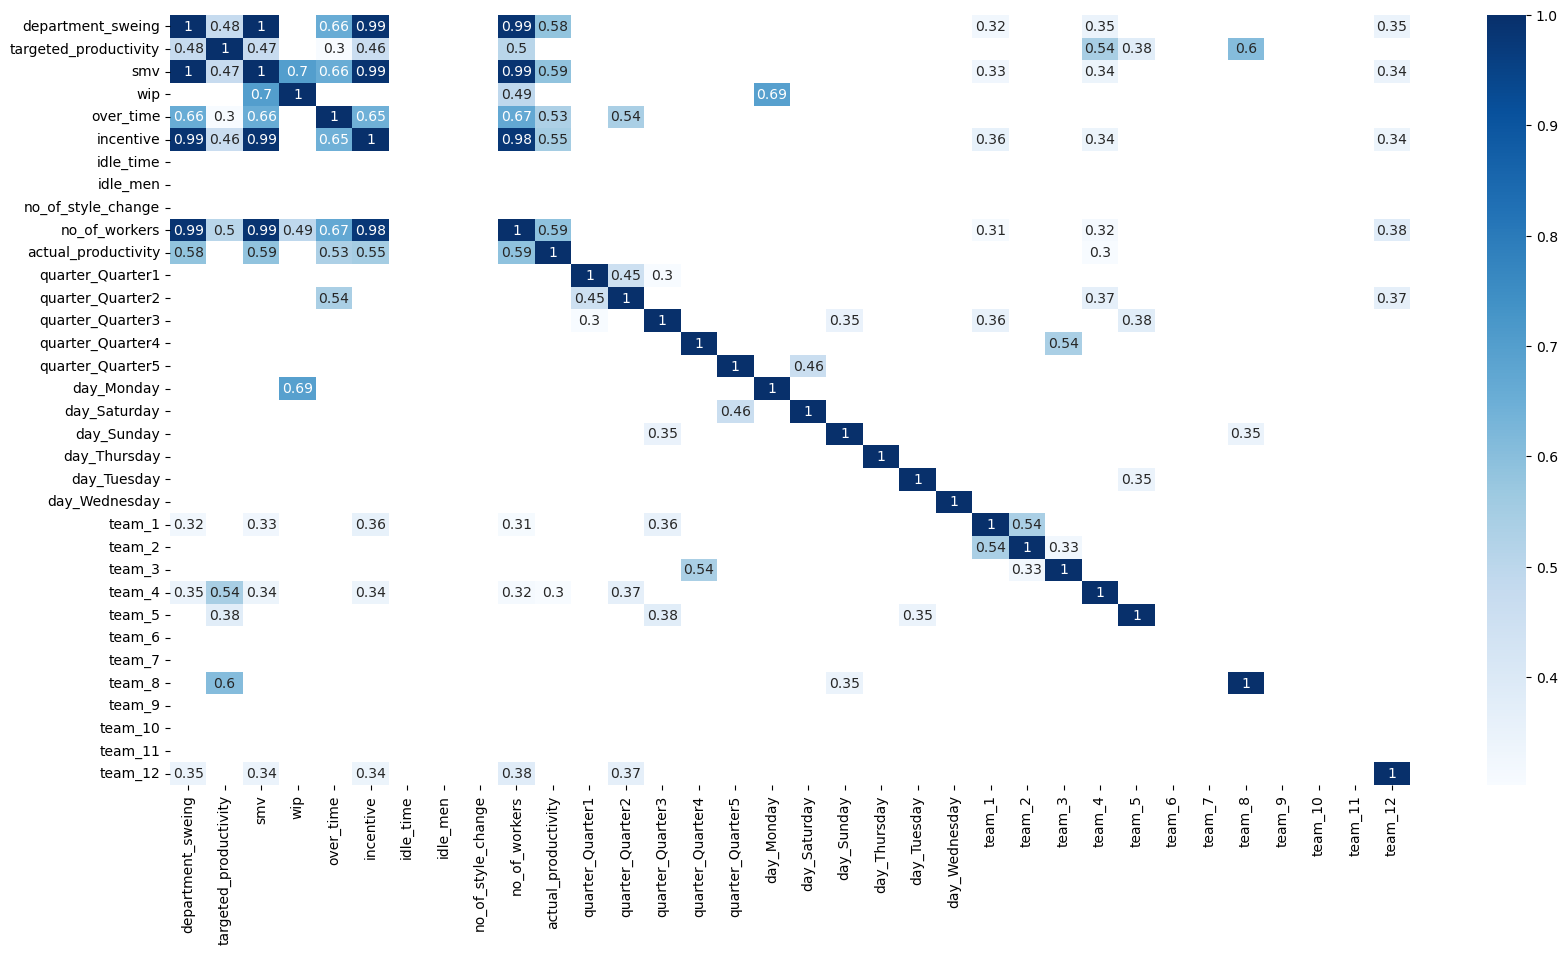

In [43]:
wip_mean = df['wip'].mean()
filtered_df['wip'].fillna(wip_mean)
filtered_correlations_wip_mean = abs(filtered_df.corr())
plt.figure(figsize=(20,10))
sns.heatmap(filtered_correlations_wip_mean[filtered_correlations_wip_mean > 0.3], annot=True, cmap='Blues')
plt.show()

Above we can see that even with mean `wip` values, `wip` does not correlate with productivity. The columns that correlate with productivity are `department_sweing`, `smv`, `over_time`, `incentive`, `no_of_workers`. We will use these as our features. 

Some teams also correlate with productivity, but we won't use these in our model. The documentation doesn't tell us any information about teams, so perhaps there are different people, completely different projects that are easier to do or some other random variables that affect different teams performance. It would also not work for all the teams to use just few of them in our model.

#### Two Productivity Columns

We want our model to predict productivity, but we have two productivity columns. Because of this we are going to create a new column `productivity`, which contains values `True` and `False` (true if actual productivity is higher than targeted productivity). We will also remove `actual_productivity` and `targeted_productivity` columns.

In [44]:
df['productivity'] = df['actual_productivity'] > df['targeted_productivity']
df.drop(columns = ['actual_productivity', 'targeted_productivity'], axis=1, inplace=True)
df.sample(10)

,department_sweing,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,...,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,productivity
620,1,22.52,1039.0,6720,113,0.0,0,0,56.0,True,...,False,False,False,False,False,False,True,False,False,True
143,0,4.15,NaN,2160,0,0.0,0,0,12.0,False,...,False,False,False,False,False,False,False,False,False,False
830,1,22.52,1374.0,3960,63,0.0,0,0,57.0,False,...,False,False,False,False,False,False,False,False,False,True
470,1,29.12,1294.0,6960,50,0.0,0,0,58.0,False,...,False,False,False,False,False,True,False,False,False,True
524,0,3.94,NaN,1800,0,0.0,0,0,15.0,False,...,False,False,False,False,False,False,False,False,False,True
1087,0,4.60,NaN,1080,0,0.0,0,0,9.0,True,...,False,False,False,False,False,False,False,False,True,True
900,0,2.90,NaN,960,0,0.0,0,0,8.0,False,...,False,False,False,False,False,True,False,False,False,False
33,0,4.15,NaN,960,0,0.0,0,0,8.0,True,...,False,False,False,False,False,False,False,False,False,False
823,0,5.13,NaN,1200,0,0.0,0,0,10.0,False,...,False,False,False,False,False,False,False,False,True,True
131,1,28.08,942.0,10530,75,0.0,0,0,58.5,False,...,True,False,False,False,False,False,False,False,False,True


## Building the Tree

As a reminder the columns we will be using are the following:
- `department_sweing`
- `smv`
- `over_time`
- `incentive`
- `no_of_workers`

Now that we know the columns and we have cleaned all of them, we are ready to build our decision tree. We will be using scikit learn's libraries for building the tree. First we have to split our dataset into training set (70% of the data) and a test set (30% of the data).

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature_columns = ['department_sweing', 'smv', 'over_time', 'incentive', 'no_of_workers']
X = df[feature_columns]
y = df['productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

#setting max_depth to 3, because we are going to visualize this later
tree_model = DecisionTreeClassifier(max_depth=3, random_state=3)
tree_model.fit(X_train, y_train)
predictions = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Model's accuracy is: {accuracy}")

(837, 5) (360, 5) (837,) (360,)
productivity
True     597
False    240
Name: count, dtype: int64
productivity
True     272
False     88
Name: count, dtype: int64
Model's accuracy is: 0.8277777777777777


Our model has an accuracy of 82.7%, which is pretty good.

### Visualizing and Evaluating the Tree

Now that we have built our first tree, we are going to visualize it here.

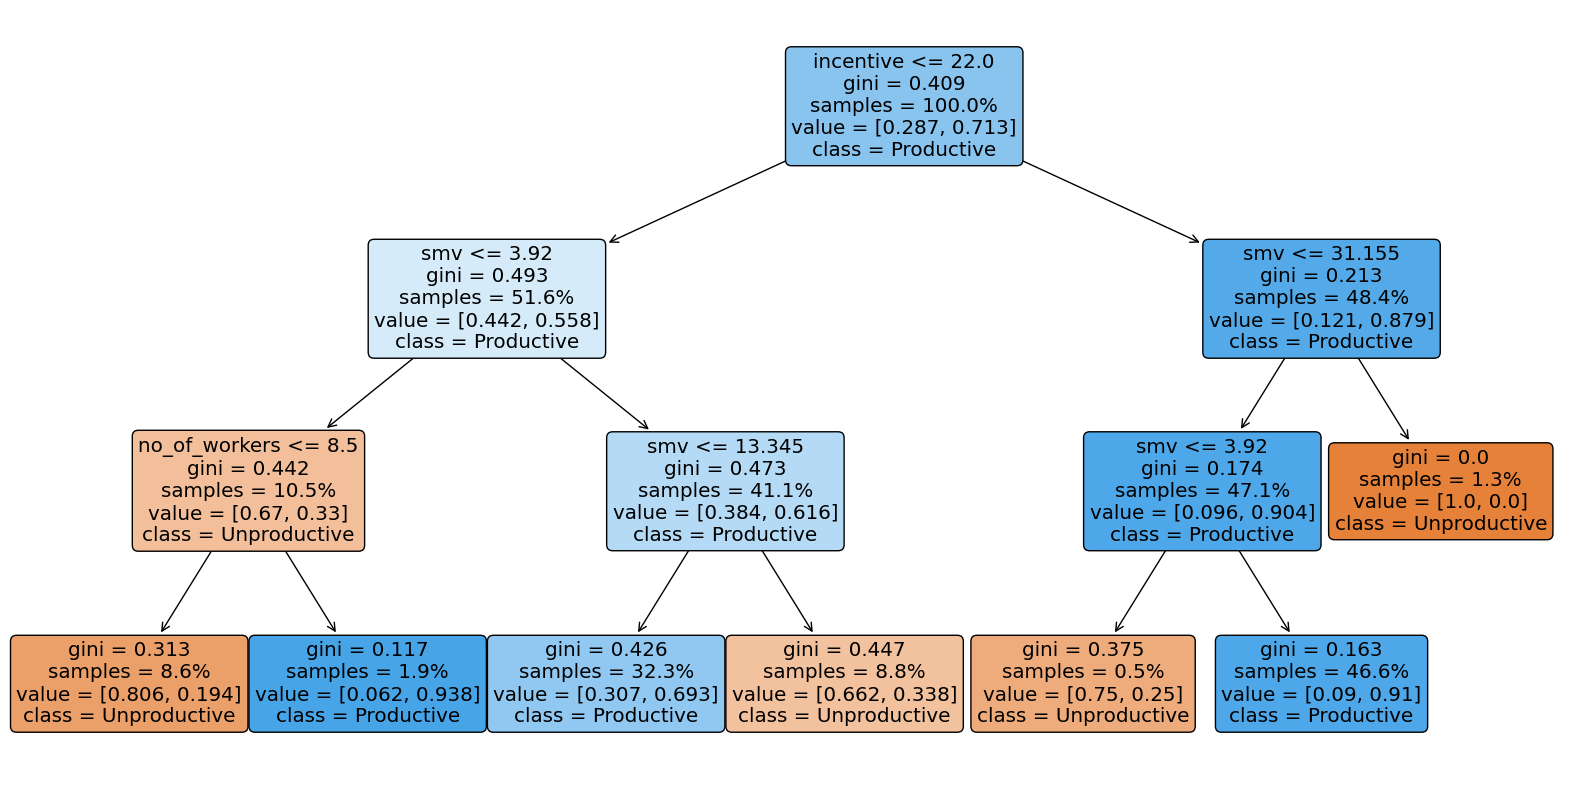

In [72]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model,
          feature_names = X.columns,
          class_names=['Unproductive', 'Productive'],
          rounded=True,
          filled=True, 
          proportion=True)
plt.show()

From our tree visualization we can see that the most significant column for classification turned out to be `incentive`, because it is the root of the tree. If the incentive is <= 22, we move to the right side of the tree (True values are always right), if not we move to the left side. Then we have the second most significant column: `smv`, which has a threshold of 3.92 on the left and 31.155 on the right. Again we go to left if the boolean is `False` and right if the boolean is `True`, until we reach the result.

Next we are going to calculate Precision, Recall and F1 Score.

In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[ 44,  44],
       [ 18, 254]])

Above we have confusion matrix, which contains the following values:
- <b>True Negatives:</b> 44
- <b>False Positives:</b> 44
- <b>False Negtives:</b> 18
- <b>True Positives:</b> 254

Now that we know all of these values, we can calculate Precision, Recall and F1 Score (we can do it with libraries too). Let's start with
$$ Precision = \frac{TP}{TP+FP} $$

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions)
precision

0.8523489932885906

$$ Recall = \frac{TP}{TP+FN} $$

In [83]:
recall = recall_score(y_test, predictions)
recall

0.9338235294117647

$$ \textnormal{F1-Score} = 2 * \frac{Precision * Recall}{Precision + Recall} $$

In [84]:
f1score = f1_score(y_test, predictions)
f1score

0.8912280701754386

Above we see that we have the following values:
- Precision : 0.85
- Recall: 0.93
- F1-Score: 0.89

All of these are very good, even better than the accuracy (0.83). 

## Random Forest

Let's finally try if we can improve the accuracy using random forest algorithm.

In [91]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=3)
forest_model.fit(X_train, y_train)
predictions = forest_model.predict(X_test)
forest_accuracy_score = accuracy_score(y_test, predictions)
forest_accuracy_score

0.8222222222222222

Our first random forest model has almost the same accuracy. The tree model had an accuracy of 82.7%, the forest model has 82.2%. Next we will use gridsearch to find optimal hyperparameters to see if the forest model improves.

In [104]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 150,200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 50, 100]
}


gscv = GridSearchCV(forest_model, param_grid = parameters, n_jobs = -1, cv = 5)
gscv.fit(X_train, y_train)

best_model = gscv.best_estimator_
best_params = gscv.best_params_

best_model_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_model_pred)

best_accuracy

0.8305555555555556

Above, we used different hyperparameters to find out the best model. We only tested a few different parametes because running these took around a minute, while more parameters could take over a day.

Our best model achieved an accuracy of 83%, which is only slightly better than the decision tree's accuracy of 82.7%. While it's possible that trying more parameters could improve the model slightly, we are satisfied with this level of accuracy. This result also shows that the decision tree model performed very well, as it has almost the same accuracy as the random forest model.

Decision Trees have a tendency to overfit the data, which is way it's a good idea to double-check trees with a Random Forest model.